# Regression in Machine Learning

In [8]:
## Housing dataset

#In this class, we use machine learning to predict the housing price based on features like house size, bedrooms, etc. This is a typical regression problem in machine learning.

#Regression is supervised learning method that can be used to predict a value for new, unseen data.

---

#### Activity 1.        

* Import the `Housing.csv` dataset with Pandas

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


db = pd.read_csv("/Users/danilobarbosa/Desktop/MachineLearning/housing.csv")

print(db)

     rownames   price  lotsize  bedrooms  bathrms  stories driveway recroom  \
0           1   42000     5850         3        1        2      yes      no   
1           2   38500     4000         2        1        1      yes      no   
2           3   49500     3060         3        1        1      yes      no   
3           4   60500     6650         3        1        2      yes     yes   
4           5   61000     6360         2        1        1      yes      no   
..        ...     ...      ...       ...      ...      ...      ...     ...   
541       542   91500     4800         3        2        4      yes     yes   
542       543   94000     6000         3        2        4      yes      no   
543       544  103000     6000         3        2        4      yes     yes   
544       545  105000     6000         3        2        2      yes     yes   
545       546  105000     6000         3        1        2      yes      no   

    fullbase gashw airco  garagepl prefarea  
0    

---

#### Activity 2.

* Use only the `lotsize` column of data frame as the feature to predict the `price` column.
* Split the data into training and test sets. Make sure that the test set corresponds to 1/10th of your data.

In [16]:
from sklearn.model_selection import train_test_split

X = db[['lotsize']] 
y = db['price']    

# Separa 90% para treino e 10% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


---

#### Activity 3.

* Plot the training data `

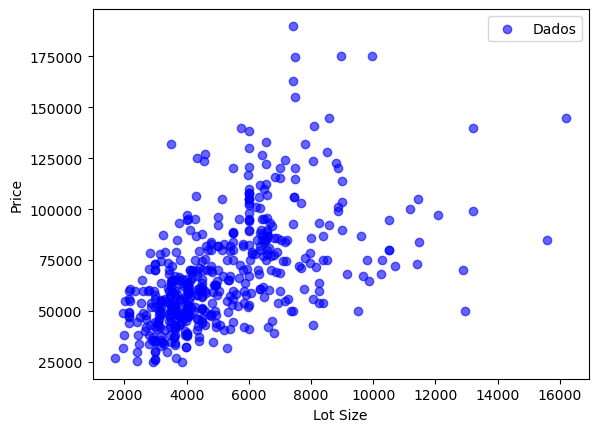

In [18]:
plt.scatter(X_train, y_train,color='blue', alpha=0.6, label='Training Data')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.legend(["Dados"])
plt.show()

---

#### Activity 4.

* Train a linear regression model. The algorithm can be imported from the `sklearn.linear_model` library under the name `LinearRegression`. `

In [20]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

#Treina o modelo com os dados de separados para treino
modelo.fit(X_train, y_train)

b = modelo.intercept_
a = modelo.coef_[0]

print(a)
print(b)

6.8105377146670545
33341.19160803933


---

#### Activity 5.

* Plot the test data and predictions of the model above

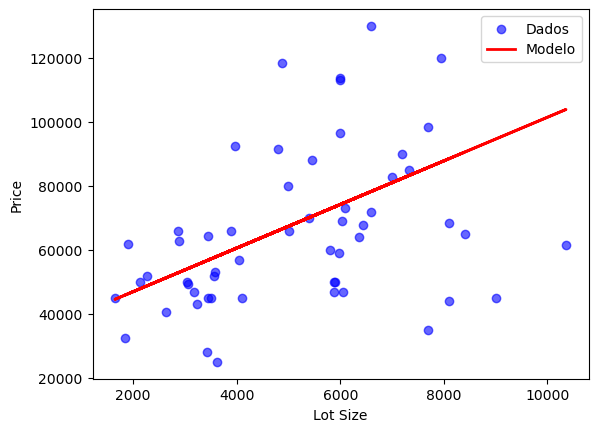

In [22]:

y_pred = a * X_test + b

plt.scatter(X_test, y_test, color='blue', alpha=0.6)
plt.plot(X_test, y_pred, color='red', linewidth=2)

plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.legend(['Dados','Modelo'])
plt.show()


---

#### Activity 6.

#### Metrics for regression

In this activity, we will use three popular regression metrics to assess the error score of a regression model. 

The first metric is the **Mean Squared Error (MSE)**, which is calculated as the average of the squared differences between predicted and expected target values in a dataset:

MSE = $\frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y_i})^2$,

where $y_i$ is the $i^th$ expected value in the dataset and \hat{y_i} is the i’th predicted value. Note that the difference between these two values is squared, which has the effect of removing the sign, resulting in a positive error value.

The second metric is the **Root Mean Squared Error (RMSE)**, which is calculated as the square root of the mean squared error:

RMSE = $\sqrt{\frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y_i})^2}$.

Note that the units of the RMSE are the same as the original units of the target value that is being predicted.

Lastly, similar to RMSE, the **Mean Absolute Error (MAE)** is a metric where the units of the error score match the units of the target value that is being predicted. MAE is calculated as the average of the absolute error values:

MAE = $\frac{1}{N} \sum_{i=1}^{N}|y_i - \hat{y_i}|$.



You must now calculate the MSE, RMSE, and MAE for the trained model in Activity 4 wit the test data. You may use the `mean_absolute_error` and `mean_squared_error` classes from `sklearn.linear_model` to calculate the metrics.

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rsme = (mse)
mae = mean_absolute_error(y_test, y_pred)

print("(MSE):", mse)
print("(RMSE):", rsme)
print("(MAE):", mae)


(MSE): 531338052.29459506
(RMSE): 531338052.29459506
(MAE): 17733.884478248976


---

#### Activity 7.

* Train a polynomial regression model. You must first transform your feature into a polynomial feature with the `PolynomialFeatures` class in `sklearn.preprocessing` module. Then, use `LinearRegression` class to train the model.

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Treina o modelo de regressão linear com as features polinomiais
modelo_poly = LinearRegression()
modelo_poly.fit(X_train_poly, y_train)

# Faz previsões usando o modelo polinomial
y_pred_poly = modelo_poly.predict(X_test_poly)

---

#### Activity 8.

* Plot the test data and predictions of the model above.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


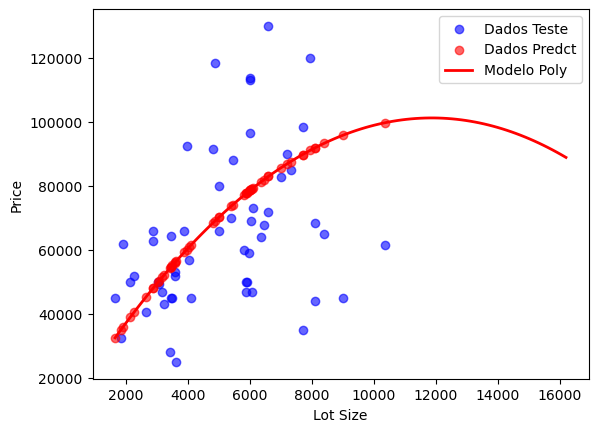

In [35]:
# Visualiza o modelo polinomial
plt.scatter(X_test, y_test, color='blue', alpha=0.6)
plt.scatter(X_test, y_pred_poly, color='red', alpha=0.6)
#plt.scatter(X_train, y_train, color='green', alpha=0.6)

X_plot = np.linspace(X['lotsize'].min(), X['lotsize'].max(), 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot_poly = modelo_poly.predict(X_plot_poly)

plt.plot(X_plot, y_plot_poly, color='red', linewidth=2)

plt.xlabel('Lot Size')
plt.ylabel('Price')
#plt.legend(['Dados Teste', 'Dados Predct','Dados Treino', 'Modelo Poly'])
plt.legend(['Dados Teste', 'Dados Predct', 'Modelo Poly'])
plt.show()

---

#### Activity 9.
 
* Calculate the MSE, RMSE, and MAE for the trained model in Activity 7 wit the test data.

In [38]:
# Avalia o modelo polinomial
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

print("Polynomial Model (MSE):", mse_poly)
print("Polynomial Model (MAE):", mae_poly)

Polynomial Model (MSE): 544438506.8506839
Polynomial Model (MAE): 18382.399345357884


---

#### Activity 10.

* Train a k-nearest neighbors regression model. Use the `KNeighborsRegressor` class from `sklearn.neighbors` module.

In [41]:
from sklearn.neighbors import KNeighborsRegressor

# Inicializa o modelo KNN com 5 vizinhos (pode ser ajustado conforme necessário)
modelo_knn = KNeighborsRegressor(n_neighbors=5)
modelo_knn.fit(X_train, y_train)

# Faz previsões com o modelo KNN
y_pred_knn = modelo_knn.predict(X_test)

---

#### Activity 11.

* Plot the test data and predictions of the model above.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


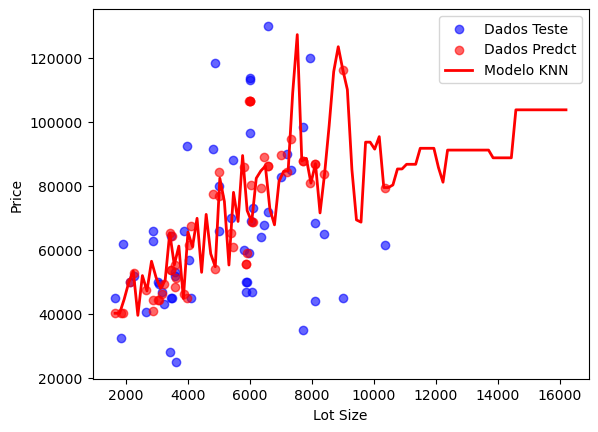

In [44]:
# Visualiza as previsões do modelo KNN
plt.scatter(X_test, y_test, color='blue', alpha=0.6)
plt.scatter(X_test, y_pred_knn, color='red', alpha=0.6)
#plt.scatter(X_train, y_train, color='green', alpha=0.6)


X_plot_knn = np.linspace(X['lotsize'].min(), X['lotsize'].max(), 100).reshape(-1, 1)
y_plot_knn = modelo_knn.predict(X_plot_knn)

plt.plot(X_plot_knn, y_plot_knn, color='red', linewidth=2)

plt.xlabel('Lot Size')
plt.ylabel('Price')
#plt.legend(['Dados Teste', 'Dados Predct','Dados Treino', 'Modelo KNN'])
plt.legend(['Dados Teste', 'Dados Predct', 'Modelo KNN'])
plt.show()

---

#### Activity 12.
 
* Calculate the MSE, RMSE, and MAE for the trained model in Activity 10 wit the test data.

In [47]:
# Avalia o modelo KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print("KNN Model (MSE):", mse_knn)
print("KNN Model (MAE):", mae_knn)

KNN Model (MSE): 586051792.282909
KNN Model (MAE): 17932.716363636366


---

#### Activity 13.

* Train a random forest regression model. Use the `RandomForestRegressor` class from `sklearn.ensemble` module.

In [50]:
from sklearn.ensemble import RandomForestRegressor
# Inicializa o modelo Random Forest com 100 árvores (pode ser ajustado conforme necessário)
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Faz previsões com o modelo Random Forest
y_pred_rf = modelo_rf.predict(X_test)

---

#### Activity 14.

* Plot the test data and predictions of the model above.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


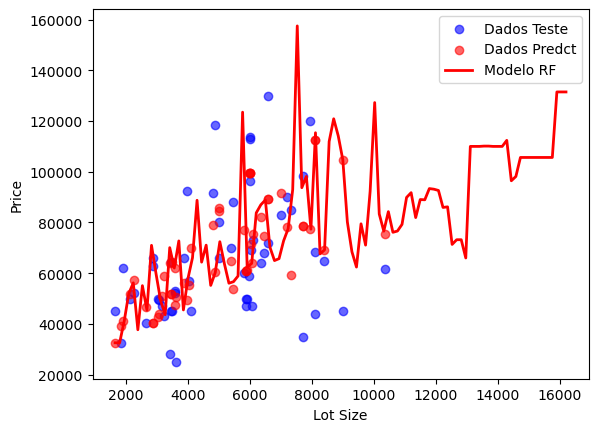

In [52]:
# Visualiza as previsões do modelo Random Forest
plt.scatter(X_test, y_test, color='blue', alpha=0.6)
plt.scatter(X_test, y_pred_rf, color='red', alpha=0.6)
#plt.scatter(X_train, y_train, color='green', alpha=0.6)

X_plot_rf = np.linspace(X['lotsize'].min(), X['lotsize'].max(), 100).reshape(-1, 1)
y_plot_rf = modelo_rf.predict(X_plot_rf)

plt.plot(X_plot_rf, y_plot_rf, color='red', linewidth=2)

plt.xlabel('Lot Size')
plt.ylabel('Price')
#plt.legend(['Dados Teste', 'Dados Predct','Dados Treino', 'Modelo RF'])
plt.legend(['Dados Teste', 'Dados Predct', 'Modelo RF'])
plt.show()

---

#### Activity 15.
 
* Calculate the MSE, RMSE, and MAE for the trained model in Activity 13 wit the test data.

In [55]:
# Avalia o modelo Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Model (MSE):", mse_rf)
print("Random Forest Model (MAE):", mae_rf)

Random Forest Model (MSE): 607342138.0439419
Random Forest Model (MAE): 18824.23253582086


---

#### Activity 16.

* Train a gradient boosting regression model. Use the `GradientBoostingRegressor` class from `sklearn.ensemble` module.

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
# Inicializa o modelo Gradient Boosting com parâmetros padrão
modelo_gb = GradientBoostingRegressor(random_state=42)
modelo_gb.fit(X_train, y_train)

# Faz previsões com o modelo Gradient Boosting
y_pred_gb = modelo_gb.predict(X_test)

---

#### Activity 17.

* Plot the test data and predictions of the model above.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


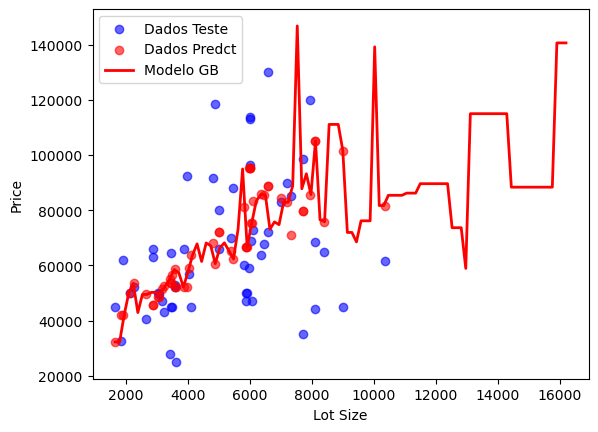

In [62]:
# Visualiza as previsões do modelo Gradient Boosting
plt.scatter(X_test, y_test, color='blue', alpha=0.6)
plt.scatter(X_test, y_pred_gb, color='red', alpha=0.6)
#plt.scatter(X_train, y_train, color='green', alpha=0.6)

X_plot_gb = np.linspace(X['lotsize'].min(), X['lotsize'].max(), 100).reshape(-1, 1)
y_plot_gb = modelo_gb.predict(X_plot_gb)

plt.plot(X_plot_gb, y_plot_gb, color='red', linewidth=2)

plt.xlabel('Lot Size')
plt.ylabel('Price')
#plt.legend(['Dados Teste', 'Dados Predct','Dados Treino', 'Modelo GB'])
plt.legend(['Dados Teste', 'Dados Predct', 'Modelo GB'])
plt.show()

---

#### Activity 18.
 
* Calculate the MSE, RMSE, and MAE for the trained model in Activity 16 wit the test data.

In [65]:
# Avalia o modelo Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("Gradient Boosting Model (MSE):", mse_gb)
print("Gradient Boosting Model (MAE):", mae_gb)

Gradient Boosting Model (MSE): 543114167.6544832
Gradient Boosting Model (MAE): 18110.186280686354


---

#### Activity 19.

* Train a SVM regression model. Use the `SVR` class from `sklearn.svm` module.

In [68]:
from sklearn.svm import SVR
# Inicializa o modelo SVR com um kernel RBF (padrão)
modelo_svm = SVR(kernel='rbf')
modelo_svm.fit(X_train, y_train)

# Faz previsões com o modelo SVR
y_pred_svm = modelo_svm.predict(X_test)

---

#### Activity 20.

* Plot the test data and predictions of the model above.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


ValueError: x and y must have same first dimension, but have shapes (100, 1) and (55,)

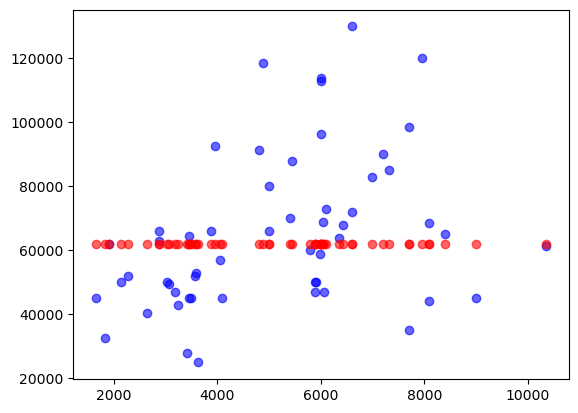

In [71]:
# Visualiza as previsões do modelo Gradient Boosting
plt.scatter(X_test, y_test, color='blue', alpha=0.6)
plt.scatter(X_test, y_pred_svm, color='red', alpha=0.6)
#plt.scatter(X_train, y_train, color='green', alpha=0.6)

X_plot_svm = np.linspace(X['lotsize'].min(), X['lotsize'].max(), 100).reshape(-1, 1)
y_plot_svm = modelo_svm.predict(X_plot_svm)

plt.plot(X_plot_svm, y_pred_svm, color='red', linewidth=2)

plt.xlabel('Lot Size')
plt.ylabel('Price')
#plt.legend(['Dados Teste', 'Dados Predct','Dados Treino', 'Modelo GB'])
plt.legend(['Dados Teste', 'Dados Predct', 'Modelo SVR'])
plt.show()

---

#### Activity 21.
 
* Calculate the MSE, RMSE, and MAE for the trained model in Activity 19 wit the test data.

In [ ]:
# Avalia o modelo SVM
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)

print("SVM Model (MSE):", mse_svm)
print("SVM Model (MAE):", mae_svm)